In [1]:
#importing libraries
import pandas as pd
import seaborn as sns

In [2]:
#importing the dataset
data = pd.read_csv('smsspamcollection\SMSSpamCollection',sep='\t',names=['label','message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


C:\Users\Chinmaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

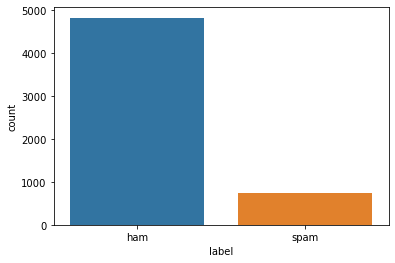

In [4]:
sns.countplot(data.label)

In [5]:
# one hot encoding the label variable
data.label = pd.get_dummies(data.label,drop_first=True)

In [6]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# importing the libraries for NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
lem = WordNetLemmatizer()
msg = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]',' ',data.message[i])
    review = review.lower()
    review = review.split()
    review = [lem.lemmatize(words) for words in review if not words in stopwords.words('english')]
    review = " ".join(review)
    msg.append(review)

In [9]:
msg

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [10]:
#importing the TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [11]:
arr = tf.fit_transform(msg).toarray()
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
len(tf.vocabulary_.keys())

3000

In [13]:
x = list(tf.vocabulary_.keys())
x.sort()

In [14]:
df = pd.DataFrame(arr,columns=x)
df.tail()

,aah,aathi,abi,abiola,able,abt,abta,ac,acc,accept,...,yo,yoga,yogasana,yor,yr,yummy,yun,yuo,yup,zed
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df['label'] = data.label
df.head()

,aah,aathi,abi,abiola,able,abt,abta,ac,acc,accept,...,yoga,yogasana,yor,yr,yummy,yun,yuo,yup,zed,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
#splitting into input and output 
x = df.drop('label',axis=1)
y = df.label
print('Input Shape',x.shape)
print('Output Shape',y.shape)

Input Shape (5572, 3000)
Output Shape (5572,)


In [17]:
#splitting into train and test
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print('Shape of Splitting')
print('X_train = {}, x_test = {}'.format(x_train.shape,x_test.shape))
print('y_train = {}, y_test = {}'.format(y_train.shape,y_test.shape))

Shape of Splitting
X_train = (4457, 3000), x_test = (1115, 3000)
y_train = (4457,), y_test = (1115,)


## Naive Bayes model

In [19]:
#importing multinomial NB
from sklearn.naive_bayes import MultinomialNB

In [20]:
nb = MultinomialNB().fit(x_train,y_train)

In [21]:
y_pred = nb.predict(x_test)

In [22]:
#plotting confusion matrix and report
from sklearn.metrics import classification_report, plot_confusion_matrix

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       968
           1       0.99      0.86      0.92       147

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



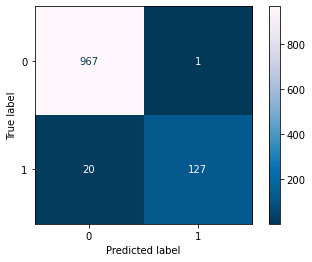

In [24]:
plot_confusion_matrix(nb,x_test,y_test,cmap='PuBu_r')

## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [ ]:
model = rand.fit(x_train,y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
plot_confusion_matrix(model,x_test,y_test)

In [ ]:
rand.get_params().keys()

In [25]:
import pickle
pickle_out = open('model.pkl','wb')
pickle.dump(nb,pickle_out)
pickle_out.close()

In [26]:
pickle_out1 = open('tfidf.pkl','wb')
pickle.dump(tf,pickle_out1)
pickle_out1.close()

In [27]:
pickle_in = open('model.pkl','rb')
model = pickle.load(pickle_in)

In [28]:
pickle_in = open('tfidf.pkl','rb')
tfidf = pickle.load(pickle_in)

In [29]:
x = 'Free entry in 2 a wkly comp to win FA Cup fina'
review = re.sub('[^a-zA-Z]',' ',x)
review = review.lower()
review = review.split()
review = [lem.lemmatize(words) for words in review if not words in stopwords.words('english')]
review = [' '.join(review)]
a = tfidf.transform(review).toarray()
print(a)

[[0. 0. 0. ... 0. 0. 0.]]


In [30]:
from collections import Counter

In [31]:
Counter(review)

Counter({'free entry wkly comp win fa cup fina': 1})

In [32]:
model.predict(a)

array([1], dtype=uint8)

In [36]:
data[data.label==1]

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...
